# Loading The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [4]:
df=pd.read_csv("C:/Users/Shruti Jain/Downloads/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
data_df=df.filter(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1)


In [41]:
data_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Finding optuimum number of clusters

In [43]:
from sklearn.cluster import KMeans
x=data_df.iloc[:, :].values
wcs=[] #within cluster sum of squares

In [44]:
for i in range(1,21):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=250,n_init=15,random_state=0)
    model.fit(x)
    wcs.append(model.inertia_)
print(wcs)

[680.8244000000001, 152.36870647733906, 78.94084142614601, 57.317873214285726, 46.535582051282056, 38.93096304967175, 34.19068792479663, 30.063874432733137, 27.879287878787885, 26.048202248044355, 24.53046205587498, 22.66755032467533, 21.674776515151514, 20.30094696969697, 19.048410700410702, 17.63887987012987, 16.941791625041628, 16.293817496229266, 15.329051587301588, 14.824639249639255]


# Plotting the wcs

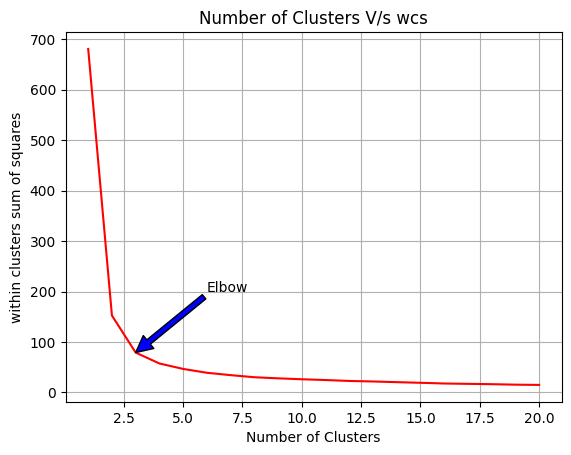

In [45]:
plt.plot(range(1,21),wcs,color='r')
plt.title('Number of Clusters V/s wcs')
plt.xlabel("Number of Clusters")
plt.ylabel("within clusters sum of squares")
plt.annotate('Elbow',xytext=(6,200),xy=(3,79),arrowprops={'facecolor':'blue'})
plt.grid()
plt.show()

## From the above graph, Elbow occurs at number of clusters equivalent to 3

### Optimum number of clusters for the given dataset is 3

# Train the model

In [47]:
model=KMeans(n_clusters=3,init='k-means++',max_iter=250,n_init=15,random_state=0)
y=model.fit_predict(x)

# Visualizing the Clusters

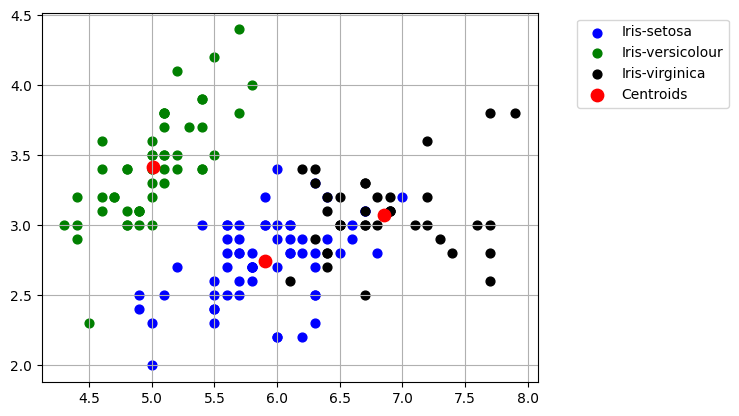

In [51]:
#Plotting clusters for sepal length and sepal width column of input dataset
plt.scatter(x[y==0,0],x[y==0,1],s=40,c='blue',label='Iris-setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=40,c='green',label='Iris-versicolour')
plt.scatter(x[y==2,0],x[y==2,1],s=40,c='black',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=80,c='red',label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.4,1))
plt.grid()
plt.show()

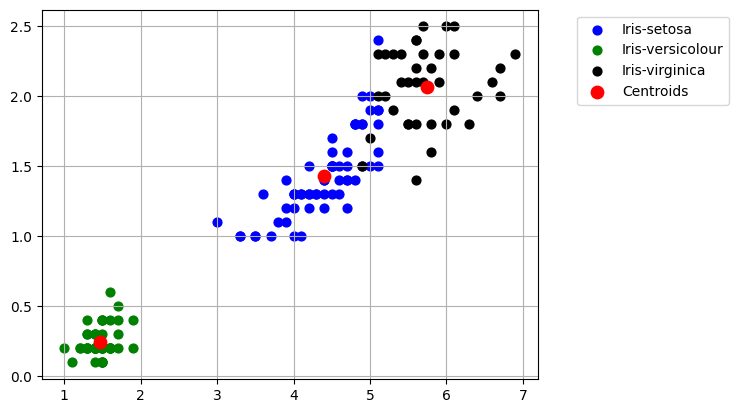

In [52]:
#Plotting clusters for petal length and petal width column of input dataset
plt.scatter(x[y==0,2],x[y==0,3],s=40,c='blue',label='Iris-setosa')
plt.scatter(x[y==1,2],x[y==1,3],s=40,c='green',label='Iris-versicolour')
plt.scatter(x[y==2,2],x[y==2,3],s=40,c='black',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],s=80,c='red',label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.4,1))
plt.grid()
plt.show()